# Libraries & Data

In [1]:
# Check that the venv is activated
import sys
print(sys.executable)

/usr/local/var/www/conjoint-jonhwilliams-com/venv/bin/python


In [2]:
# Install library
!pip install squarify

In [3]:
# Verify current directory
import os
cwd = os.getcwd()
print(cwd)

/usr/local/var/www/conjoint-jonhwilliams-com/notebooks


In [4]:
# Import libraries (depends on pip installs in venv)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
# Load some data
df = pd.read_csv('../data/raw/netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


# Data Processing

In [6]:
# Isolate Y and y
y = df.selected
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [7]:
# Create dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


In [8]:
print(X_dummy.dtypes)

NumberAccounts_1                bool
NumberAccounts_2                bool
NumberAccounts_3                bool
NumberAccounts_4                bool
NumberAccounts_5                bool
NumberAccounts_6                bool
price_8                         bool
price_10                        bool
price_12                        bool
price_15                        bool
price_18                        bool
price_20                        bool
ExtraContent_Disney             bool
ExtraContent_HBO                bool
ExtraContent_Marvel             bool
ExtraContent_Prime originals    bool
ExtraContent_Soccer             bool
ExtraContent_less content       bool
ads_none                        bool
ads_one_per_day                 bool
ads_one_per_show                bool
dtype: object


In [9]:
# Prefer ints from bool
X_dummy = X_dummy.astype(int)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


# Technical process description
## Visualization
---  
| Selected | Price | Ads | ExtraContent | #Accounts |
|----------|-------|-----|--------------|--------------|
| True     | 10    | one_per_show | Disney | |
| False    | 15    | none | HBO | |
| True     | 18    | one_per_day | Marvel | |
|          |       |     |              | |

Where `Selected` is dependent and the four remaining columns are Independent Variables  
We perform Logistic Regression and secure coefficients to understand relavance of levels  
> Logistic regression coefficients are essential for understanding the relevance, direction, and magnitude of the effects of predictor variables on a binary or categorical outcome  

# Regression
If !import statsmodels do so with pip now

In [10]:
# Build regression model
model = sm.GLM(y,
              X_dummy,
              family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Mon, 22 Apr 2024   Deviance:                       3896.6
Time:                        21:08:30   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7046      0.090     -7.804      0.000      -0.882      -0.528
NumberAccounts_2                -0.0733      0.088     -0.829      0.407      -0.247       0.100
NumberAccounts_3                -0.0219      0.088     -0.250      0.803      -0.194       0.150
NumberAccounts_4                 0.1252      0.084      1.499      0.134      -0.039       0.289
NumberAccounts_5                 0.1319      0.085      1.560      0.119      -0.034       0.298
NumberAccounts_6                 0.4974      0.083      5.985      0.000       0.335       0.660
price_8                          0.2971      0.085      3.491      0.000       0.130       0.464
price_10                         0.2207      0.087      2.528      0.011       0.050       0.392
price_12                         0.2018      0.083      2.441      0.015       0.040       0.364
price_15                         0.0197      0.084      0.234      0.815      -0.146       0.185
price_18                        -0.1030      0.087     -1.182      0.237      -0.274       0.068
price_20                        -0.6817      0.091     -7.524      0.000      -0.859      -0.504
ExtraContent_Disney              0.2281      0.088      2.597      0.009       0.056       0.400
ExtraContent_HBO                 0.2270      0.085      2.665      0.008       0.060       0.394
ExtraContent_Marvel              0.1452      0.084      1.722      0.085      -0.020       0.310
ExtraContent_Prime originals     0.1278      0.087      1.475      0.140      -0.042       0.298
ExtraContent_Soccer             -0.2046      0.085     -2.400      0.016      -0.372      -0.038
ExtraContent_less content       -0.5688      0.088     -6.494      0.000      -0.740      -0.397
ads_none                         0.2081      0.056      3.742      0.000       0.099       0.317
ads_one_per_day                  0.1091      0.056      1.932      0.053      -0.002       0.220
ads_one_per_show                -0.3626      0.057     -6.350      0.000      -0.474      -0.251
================================================================================================
"""

# Conjoint Analysis
A type of discrete choice modeling, where the dependent variable is the respondent's choice or preference among the presented product profiles. The part-worth utilities (or preference weights) estimate the relative importance or value that respondents placed on each attribute level.

In [11]:
# Create a df with the results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                         'partworth': model.params.values,
                         'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.704561,6.014611e-15
NumberAccounts_2,NumberAccounts_2,-0.073297,4.069898e-01
NumberAccounts_3,NumberAccounts_3,-0.021939,8.026008e-01
NumberAccounts_4,NumberAccounts_4,0.125153,1.339576e-01
NumberAccounts_5,NumberAccounts_5,0.131899,1.186600e-01
NumberAccounts_6,NumberAccounts_6,0.497413,2.170064e-09
price_8,price_8,0.297140,4.819664e-04
price_10,price_10,0.220663,1.147964e-02
price_12,price_12,0.201829,1.465800e-02
price_15,price_15,0.019724,8.151816e-01


In [12]:
# Identify significant variables
df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.704561,6.014611e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073297,4.069898e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021939,8.026008e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125153,1.339576e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131899,1.186600e-01,False,red


If !matplotlib pip install, and import now. If the font.conf error annoys you fix it.

In [13]:
# Sort values
df_result = df_result.sort_values(by = 'partworth', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

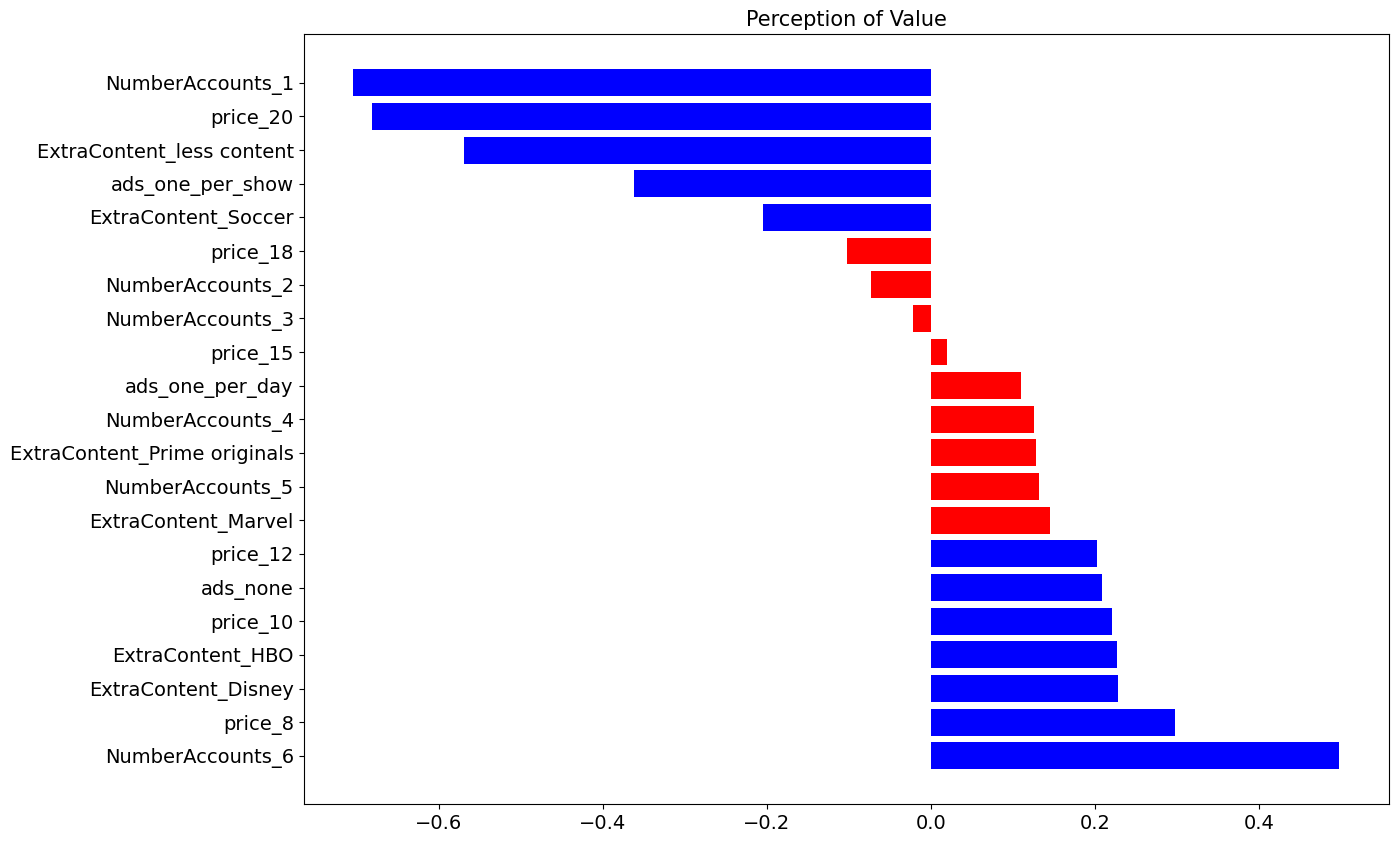

In [25]:
# Plot part-worth
f, ax = plt.subplots(figsize = (14,10))
values = df_result.partworth
xbar = np.arange(len(values))


# Bar plot
plt.title("Perception of Value", fontsize = 15)
plt.barh(xbar,
         values,
         color = df_result['color'])
plt.yticks(xbar,
           labels = df_result['param_name'],
           fontsize = 14)
plt.xticks(fontsize = 14)
plt.show

# Driver Specificity Grouping

In [23]:
# Isolate the feature group
feature = "price"
attributes = [] # empty lists
coefficients = []
for i in range(len(df_result)):
    # print(len(df_result))
    # print(df_result.iloc[i,:]) 
    if df_result.iloc[i,0].find(feature) == 0:
        attributes.append(df_result.iloc[i,0])
        coefficients.append(df_result.iloc[i,1])
    # print(attributes)
    # print(coefficients)
    

[]
[]
['price_8']
[0.2971402209768378]
['price_8']
[0.2971402209768378]
['price_8']
[0.2971402209768378]
['price_8', 'price_10']
[0.2971402209768378, 0.2206630214544004]
['price_8', 'price_10']
[0.2971402209768378, 0.2206630214544004]
['price_8', 'price_10', 'price_12']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895]
['price_8', 'price_10', 'price_12']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895]
['price_8', 'price_10', 'price_12']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895]
['price_8', 'price_10', 'price_12']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895]
['price_8', 'price_10', 'price_12']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895]
['price_8', 'price_10', 'price_12']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895]
['price_8', 'price_10', 'price_12', 'price_15']
[0.2971402209768378, 0.2206630214544004, 0.20182866057684895, 0.01972403593001392]
['price_8', 'price_10', 'price_12', 'price_15'

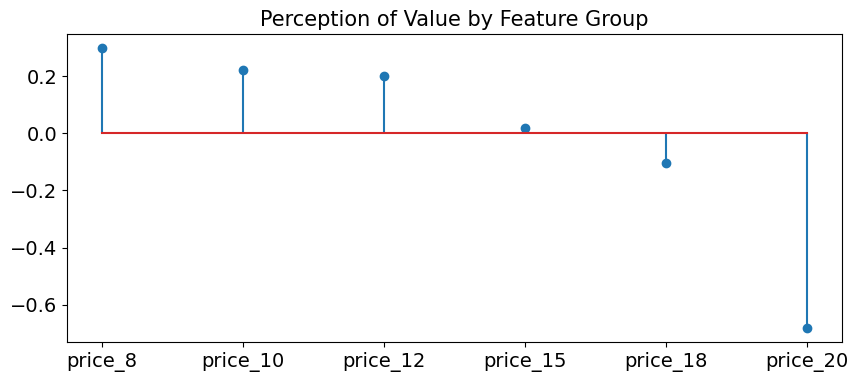

In [30]:
# Lollipop
f, ax = plt.subplots(figsize = (10,4))

# Bar plot
plt.title("Perception of Value by Feature Group", fontsize = 15)
plt.stem(attributes,
         coefficients)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.show()